## Import dependencies

In [3]:
# Import dependencies
%matplotlib inline
from support import *
import os, pickle, shutil, csv, cv2, tensorflow as tf, numpy as np, matplotlib.pyplot as plt, seaborn as sns, skimage.morphology as morp
from skimage.io import imread
from skimage.filters import rank
from sklearn.utils import shuffle, compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Input, Model, load_model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras import optimizers
from keras.initializers import random_normal
from keras.callbacks import Callback, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix

## Import training files

In [4]:
Y_train = np.load("/content/drive/MyDrive/Recognisign/dataset/npy Resnet/y_finn.npy")
labels = np.load("/content/drive/MyDrive/Recognisign/dataset/npy Resnet/label_finn.npy")
X_train = np.load("/content/drive/MyDrive/Recognisign/dataset/npy Resnet/x_finn.npy")
n_classes = len(np.unique(labels))
print("Number of classses: {}, X_train shape: {}, Y_train shape: {}".format(n_classes,X_train.shape,Y_train.shape))

Number of classses: 70, X_train shape: (8158, 60, 60, 3), Y_train shape: (8158, 70)


## Split into training and testing data

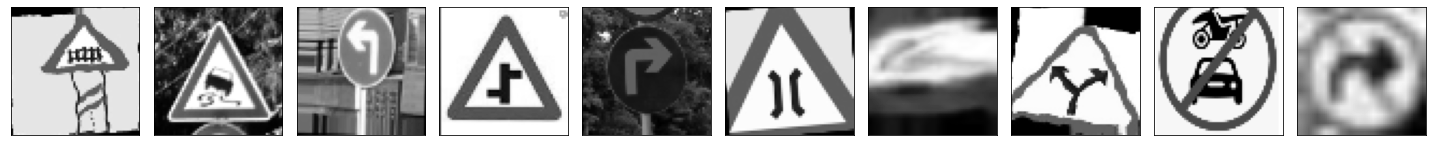

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.20)
X_train = preprocess(X_train)
X_test = preprocess(X_test)
show_images(np.squeeze(X_train),Y_train)

## Training

In [ ]:
VGG_model = VGG_variation(X_train.shape[1:])
batch_size = 128
epochs = 300
model_n = VGG_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, callbacks=[callback],
                    validation_data=(X_test,Y_test),verbose=1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 60, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 60, 60, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0     

In [27]:
VGG_model.save("/content/drive/MyDrive/Recognisign/weights/Model75.h5")

## Visualizing Loss

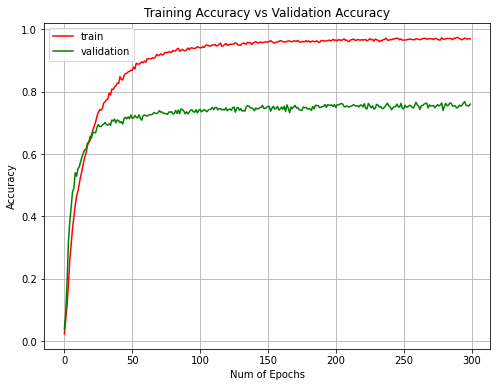

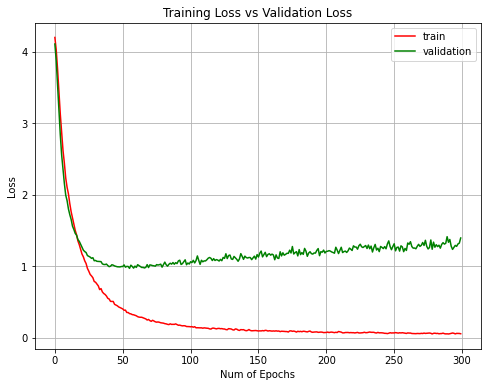

In [28]:
# Plotting ACC and LOSS of training
# Accuracy
model_history=model_n
plt.figure(figsize = (8,6))
plt.plot(model_history.history['accuracy'],'r')
plt.grid('off')
plt.plot(model_history.history['val_accuracy'],'g')
plt.xticks()
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()
# Loss 
plt.figure(figsize = (8,6))
plt.grid('off')
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks()
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

## Testing 

In [29]:
#Preprocessing and predicting the test group
X_test_processed = (X_test)
Y_test_cat=Y_test
predicted = VGG_model.predict(X_test_processed)
Y_pred = np.argmax(predicted, axis = 1)

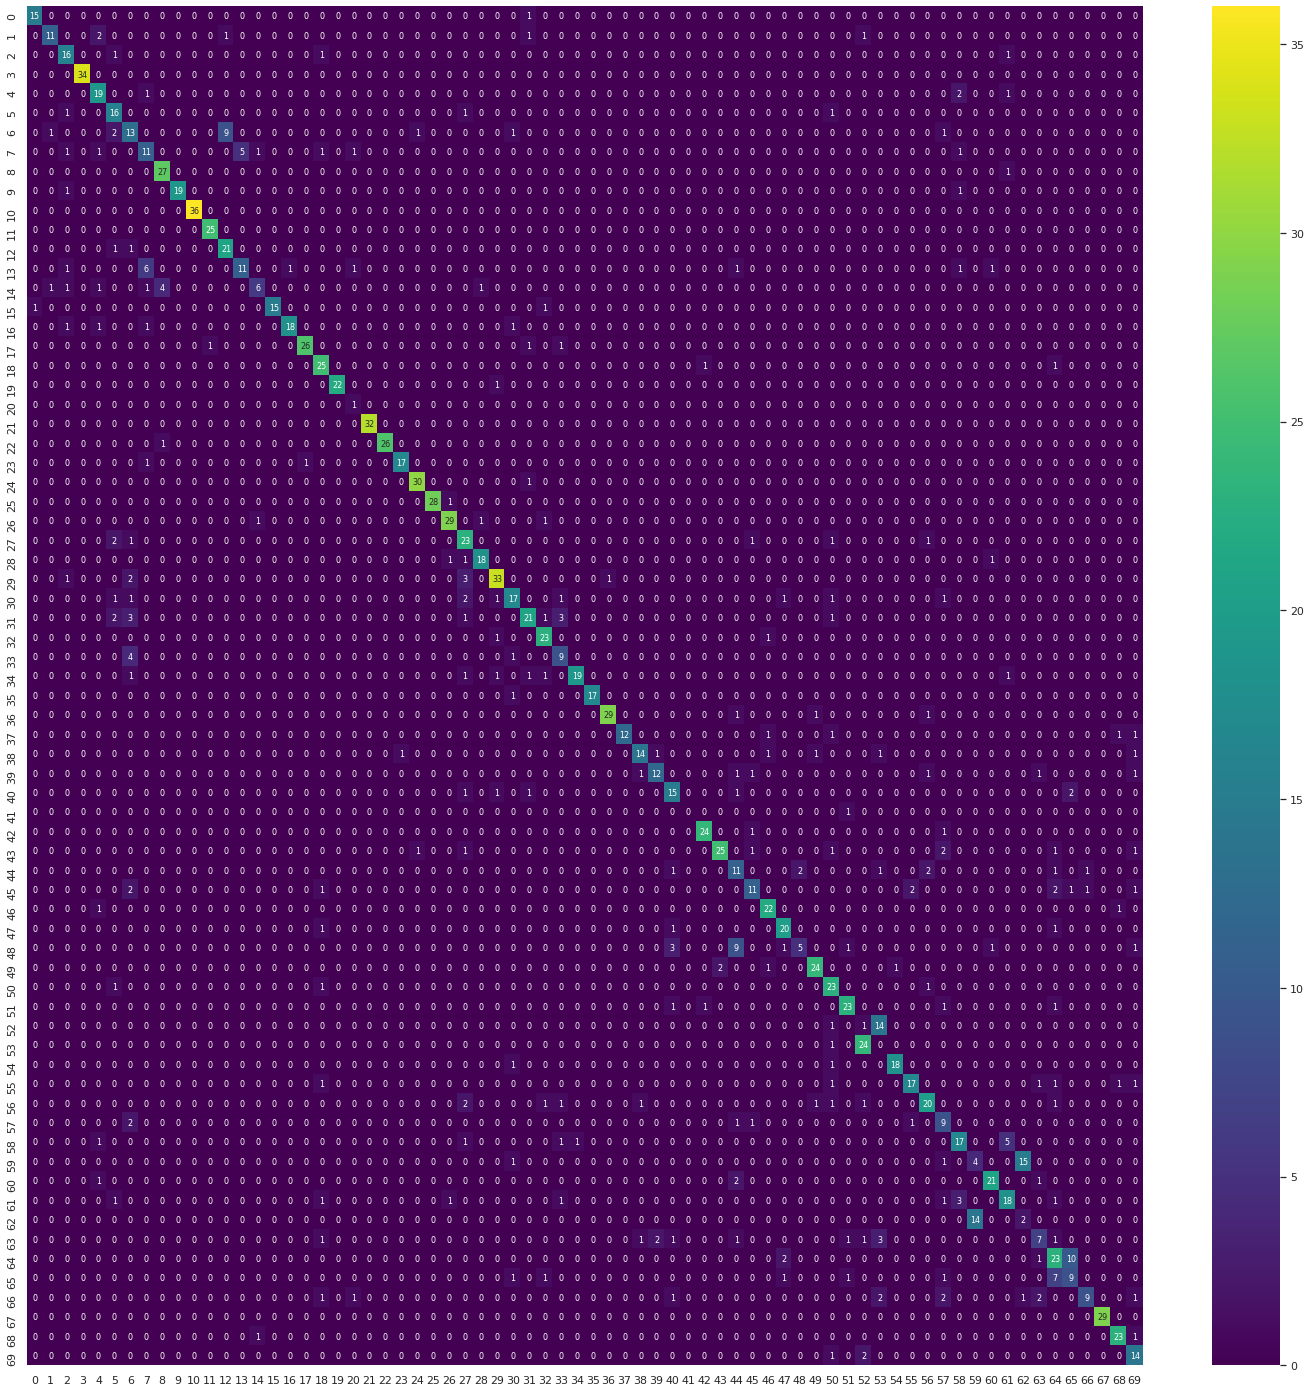

In [31]:
# Calculating and presenting the confusion matrix
cm = confusion_matrix(np.argmax(Y_test_cat,axis=1),Y_pred)
plt.figure(figsize = (25,25))
sns.set(font_scale=1)
sns.heatmap(cm, cmap = 'viridis', annot = True, annot_kws = {'size': 8})
plt.show()

In [32]:
# Printing the results
total_accurate = 0
for i in range (cm.shape[0]):
  
  print('The accuracy of class No.{} is: {:.2f}%' .format(i+1,100*cm[i,i]/cm[i].sum()))
  total_accurate += cm[i,i]

print('The total accuracy is: {:.2f}%' .format(100*total_accurate/cm.sum()))


The accuracy of class No.1 is: 93.75%
The accuracy of class No.2 is: 68.75%
The accuracy of class No.3 is: 84.21%
The accuracy of class No.4 is: 100.00%
The accuracy of class No.5 is: 82.61%
The accuracy of class No.6 is: 84.21%
The accuracy of class No.7 is: 46.43%
The accuracy of class No.8 is: 50.00%
The accuracy of class No.9 is: 96.43%
The accuracy of class No.10 is: 90.48%
The accuracy of class No.11 is: 100.00%
The accuracy of class No.12 is: 100.00%
The accuracy of class No.13 is: 91.30%
The accuracy of class No.14 is: 47.83%
The accuracy of class No.15 is: 40.00%
The accuracy of class No.16 is: 88.24%
The accuracy of class No.17 is: 81.82%
The accuracy of class No.18 is: 89.66%
The accuracy of class No.19 is: 92.59%
The accuracy of class No.20 is: 95.65%
The accuracy of class No.21 is: 100.00%
The accuracy of class No.22 is: 100.00%
The accuracy of class No.23 is: 96.30%
The accuracy of class No.24 is: 89.47%
The accuracy of class No.25 is: 96.77%
The accuracy of class No.26 i

In [33]:
d={0:"NO ENTRY", 1:"ALL MOTOR VEHICLE PROHIBITED", 2:"HAND CART PROHIBITED",3:"LEFT TURN PROHIBITED",4:"BULLOCK CART AND CART PROHIBITED",5:"HEIGHT LIMIT", 6: "NO PARKING", 7: "ONE WAY SIGN", 8:"TRUCK PROHIBITED",9:"CYCLE PROHIBITED",10:"U TURN PROHIBITED",11: 'WIDTH LIMIT', 12: 'NO STOPPING', 13: 'ONE WAY', 14: 'BULLOCK CART/TONGA PROHIBITED', 15: 'PEDESTRIANS PROHIBITED', 16: 'OVERTAKING PROHIBITED', 17: 'SPEED LIMIT', 18: 'AXLE LOAD LIMIT', 19: 'COMPULSORY AHEAD ONLY', 20: 'VEHICLE PROHIBITED IN BOTH DIRECTIONS', 21: 'RIGHT TURN PROHIBITED', 22: 'HORN PROHIBITED', 23: 'LOAD LIMIT', 24: 'RESTRICTION ENDS SIGN', 25: 'COMPULSORY KEEP LEFT', 26: 'COMPULSORY TURN LEFT', 27: 'COMPULSORY AHEAD OR TURN LEFT',28: 'COMPULSORY TURN RIGHT', 29: 'COMPULSORY AHEAD OR TURN RIGHT', 30: 'COMPULSORY TURN RIGHT AHEAD', 31: 'COMPULSORY CYCLE TRACK', 32: 'COMPULSORY TURN LEFT AHEAD', 33: 'COMPULSORY SOUND HORN', 34: 'STOP', 35: 'GIVE WAY', 36: 'RIGHT HAND CURVE', 37: 'LEFT REVERSE BEND', 38: 'NARROW BRIDGE', 39: 'SCHOOL AHEAD', 40: 'LEFT HAND CURVE', 
41: 'STEEP ASCENT', 42: 'SLIPPERY ROAD', 43: 'MEN AT WORK', 44: 'RIGHT HAIR PIN BEND', 45:'STEEP DESCENT' , 46: 'LOOSE GRAVEL', 47: 'CATTLE', 48: 'LEFT HAIR PIN BEND', 49: 'NARROW ROAD AHEAD', 50: 'CYCLE CROSSING', 51: 'FALLING ROCKS', 52: 'RIGHT REVERSE BEND', 53: 'ROAD WIDENESS AHEAD', 54: 'PEDESTRIAN CROSSING', 55: 'FERRY', 56: 'CROSS ROAD', 57: 'T INTERSECTION/MAJOR ROAD AHEAD', 58: '200 METERS', 59: 'SIDE ROAD RIGHT', 60: 'ROUND ABOUT', 61: '50-100 METERS', 62: 'SIDE ROAD LEFT', 63: 'STAGGERED INTERSECTION', 64: 'DANGEROUS DIP', 65: 'ROUGH ROAD', 66: 'Y INTERSECTION', 67: 'LENGTH LIMIT' , 68: 'BARRIER AHEAD', 69: 'GAP IN MEDIAN'}